# **Import Libraries and modules**

### Import necessary libraries

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


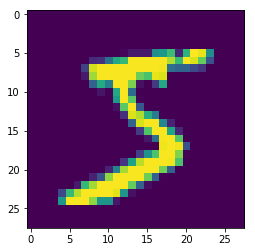

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build the model

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, input_shape=(28,28,1)))  # OutputSize=26, RF=3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3))  # OutputSize=24, RF=5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3)) # OutputSize=22, RF=7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 1, 1))  #OutputSize=22, RF=7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # OutputSize=11, RF=14


model.add(Convolution2D(64, 3, 3))  # OutputSize=9, RF=16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))  # OutputSize=7, RF=18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1))  # OutputSize=7, RF=18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))   # OutputSize=3, RF=36

model.add(Convolution2D(10, 3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-pac

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       147584    
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Train the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, validation_data=(X_test, Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 502us/step - loss: 0.3104 - acc: 0.9575 - val_loss: 0.1053 - val_acc: 0.9878
Epoch 2/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.1185 - acc: 0.9791 - val_loss: 0.0471 - val_acc: 0.9920
Epoch 3/50
60000/60000 [==============================] - 28s 467us/step - loss: 0.0785 - acc: 0.9846 - val_loss: 0.0355 - val_acc: 0.9921
Epoch 4/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.0564 - acc: 0.9877 - val_loss: 0.0346 - val_acc: 0.9915
Epoch 5/50
60000/60000 [==============================] - 27s 453us/step - loss: 0.0459 - acc: 0.9894 - val_loss: 0.0240 - val_acc: 0.9935
Epoch 6/50
60000/60000 [==============================] - 28s 467us/step - loss: 0.0377 - acc: 0.9910 - val_loss: 0.0333 - val_acc: 0.9904
Epoch 7/50
60000/60000 [==============================] - 27s 452us/step - loss: 0.0314 - acc: 0.9920 - val_loss: 0.

Since I am not saving the best model, running a few more times to get past validation accuracy of 99.4

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=4, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
  320/60000 [..............................] - ETA: 33s - loss: 0.0014 - acc: 1.0000    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 28s 464us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0219 - val_acc: 0.9939
Epoch 2/4
60000/60000 [==============================] - 27s 451us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0235 - val_acc: 0.9941
Epoch 3/4
60000/60000 [==============================] - 27s 450us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0204 - val_acc: 0.9950
Epoch 4/4
60000/60000 [==============================] - 28s 463us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0219 - val_acc: 0.9945


In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
  352/60000 [..............................] - ETA: 32s - loss: 0.0018 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 28s 459us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0217 - val_acc: 0.9951


### Evaluate the model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.021698270867756945, 0.9951]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[7.48866569e-09 6.62301147e-08 1.19284727e-09 7.46751283e-09
  4.07873948e-08 5.46863532e-09 2.35732678e-08 9.99999881e-01
  5.81276582e-09 5.10058662e-09]
 [6.48791199e-09 4.20559454e-09 9.99999881e-01 1.74284387e-09
  1.24374591e-08 4.94983554e-10 5.15795762e-08 1.13030287e-08
  1.83045260e-10 2.98949878e-08]
 [1.70067381e-07 9.99997377e-01 7.62329222e-09 3.42787587e-07
  2.01673096e-08 3.14102721e-07 6.85553857e-07 2.01145582e-07
  2.86529254e-08 8.90569368e-07]
 [9.99999404e-01 3.68606976e-08 1.21069395e-08 3.38739113e-07
  1.39666323e-09 5.73069203e-10 1.26145054e-07 3.55133487e-08
  7.43034576e-08 3.32283911e-09]
 [3.70846520e-10 4.79218887e-09 9.63110147e-11 9.07420628e-09
  1.00000000e+00 1.65459213e-09 9.77329995e-10 1.56491389e-10
  1.01539293e-08 4.46295917e-10]
 [7.20612832e-08 9.99994636e-01 8.33848546e-09 1.28036021e-07
  2.61936215e-08 8.89722713e-08 9.48984052e-07 7.64461163e-07
  2.33153585e-08 3.30648868e-06]
 [6.04135364e-09 2.12268745e-07 1.19562915e-10 2.52195605e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

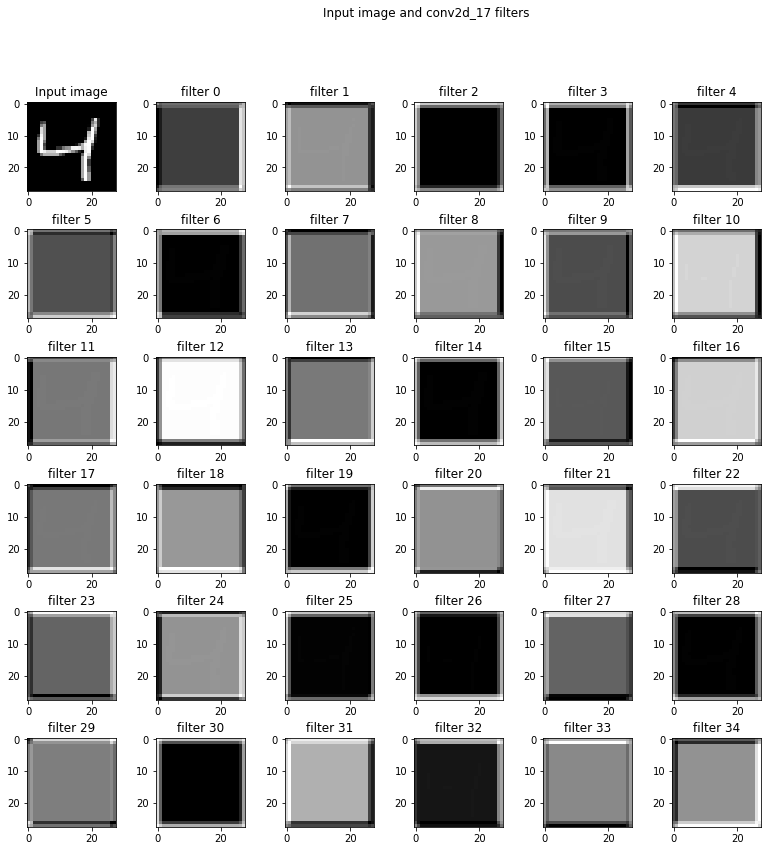

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_17'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()